In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=1000, n_features=10, n_classes=2, random_state=42)
y = y.reshape(-1, 1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
def relu(z):
    return np.maximum(0, z)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu_derivative(z):
    return (z > 0).astype(float)

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

def tanh_derivative(z):
    return 1 - np.tanh(z)**2


In [ ]:
def binary_cross_entropy_loss(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def accuracy(y_true, y_pred):
    return np.mean((y_pred > 0.5) == y_true)


In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation, activation_derivative, lr=0.01, epochs=1000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation = activation
        self.activation_derivative = activation_derivative
        self.lr = lr
        self.epochs = epochs
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.activation(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        return self.A2

    def backward(self, X, y, y_pred):
        m = X.shape[0]

        dZ2 = y_pred - y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m

        dZ1 = np.dot(dZ2, self.W2.T) * self.activation_derivative(self.Z1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W1 -= self.lr * dW1
        self.b1 -= self.lr * db1
        self.W2 -= self.lr * dW2
        self.b2 -= self.lr * db2

    def train(self, X, y):
        for epoch in range(self.epochs):
            y_pred = self.forward(X)
            loss = binary_cross_entropy_loss(y, y_pred)
            self.backward(X, y, y_pred)
            if (epoch + 1) % 100 == 0:
                print(f"Epoch {epoch + 1}/{self.epochs} - Loss: {loss:.4f}")

    def predict(self, X):
        y_pred = self.forward(X)
        return (y_pred > 0.5).astype(int)


In [ ]:

activation_functions = {
    'ReLU': (relu, relu_derivative),
    'Sigmoid': (sigmoid, sigmoid_derivative),
    'Tanh': (tanh, tanh_derivative)
}

results = {}

for name, (activation, activation_derivative) in activation_functions.items():
    print(f"Training with {name} activation function")
    nn = NeuralNetwork(input_size=10, hidden_size=5, output_size=1, activation=activation, activation_derivative=activation_derivative, lr=0.01, epochs=1000)
    nn.train(X_train, y_train)
    train_accuracy = accuracy(y_train, nn.predict(X_train))
    test_accuracy = accuracy(y_test, nn.predict(X_test))
    results[name] = {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}

for name, result in results.items():
    print(f"{name} - Train Accuracy: {result['train_accuracy']:.4f}, Test Accuracy: {result['test_accuracy']:.4f}")


Training with ReLU activation function
Epoch 100/1000 - Loss: 0.6929
Epoch 200/1000 - Loss: 0.6926
Epoch 300/1000 - Loss: 0.6923
Epoch 400/1000 - Loss: 0.6918
Epoch 500/1000 - Loss: 0.6909
Epoch 600/1000 - Loss: 0.6892
Epoch 700/1000 - Loss: 0.6860
Epoch 800/1000 - Loss: 0.6799
Epoch 900/1000 - Loss: 0.6687
Epoch 1000/1000 - Loss: 0.6496
Training with Sigmoid activation function
Epoch 100/1000 - Loss: 0.6929
Epoch 200/1000 - Loss: 0.6927
Epoch 300/1000 - Loss: 0.6926
Epoch 400/1000 - Loss: 0.6926
Epoch 500/1000 - Loss: 0.6925
Epoch 600/1000 - Loss: 0.6924
Epoch 700/1000 - Loss: 0.6923
Epoch 800/1000 - Loss: 0.6922
Epoch 900/1000 - Loss: 0.6920
Epoch 1000/1000 - Loss: 0.6918
Training with Tanh activation function
Epoch 100/1000 - Loss: 0.6928
Epoch 200/1000 - Loss: 0.6921
Epoch 300/1000 - Loss: 0.6904
Epoch 400/1000 - Loss: 0.6858
Epoch 500/1000 - Loss: 0.6738
Epoch 600/1000 - Loss: 0.6474
Epoch 700/1000 - Loss: 0.6030
Epoch 800/1000 - Loss: 0.5471
Epoch 900/1000 - Loss: 0.4916
Epoch 10

<ipython-input-10-1203eba0a009>:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


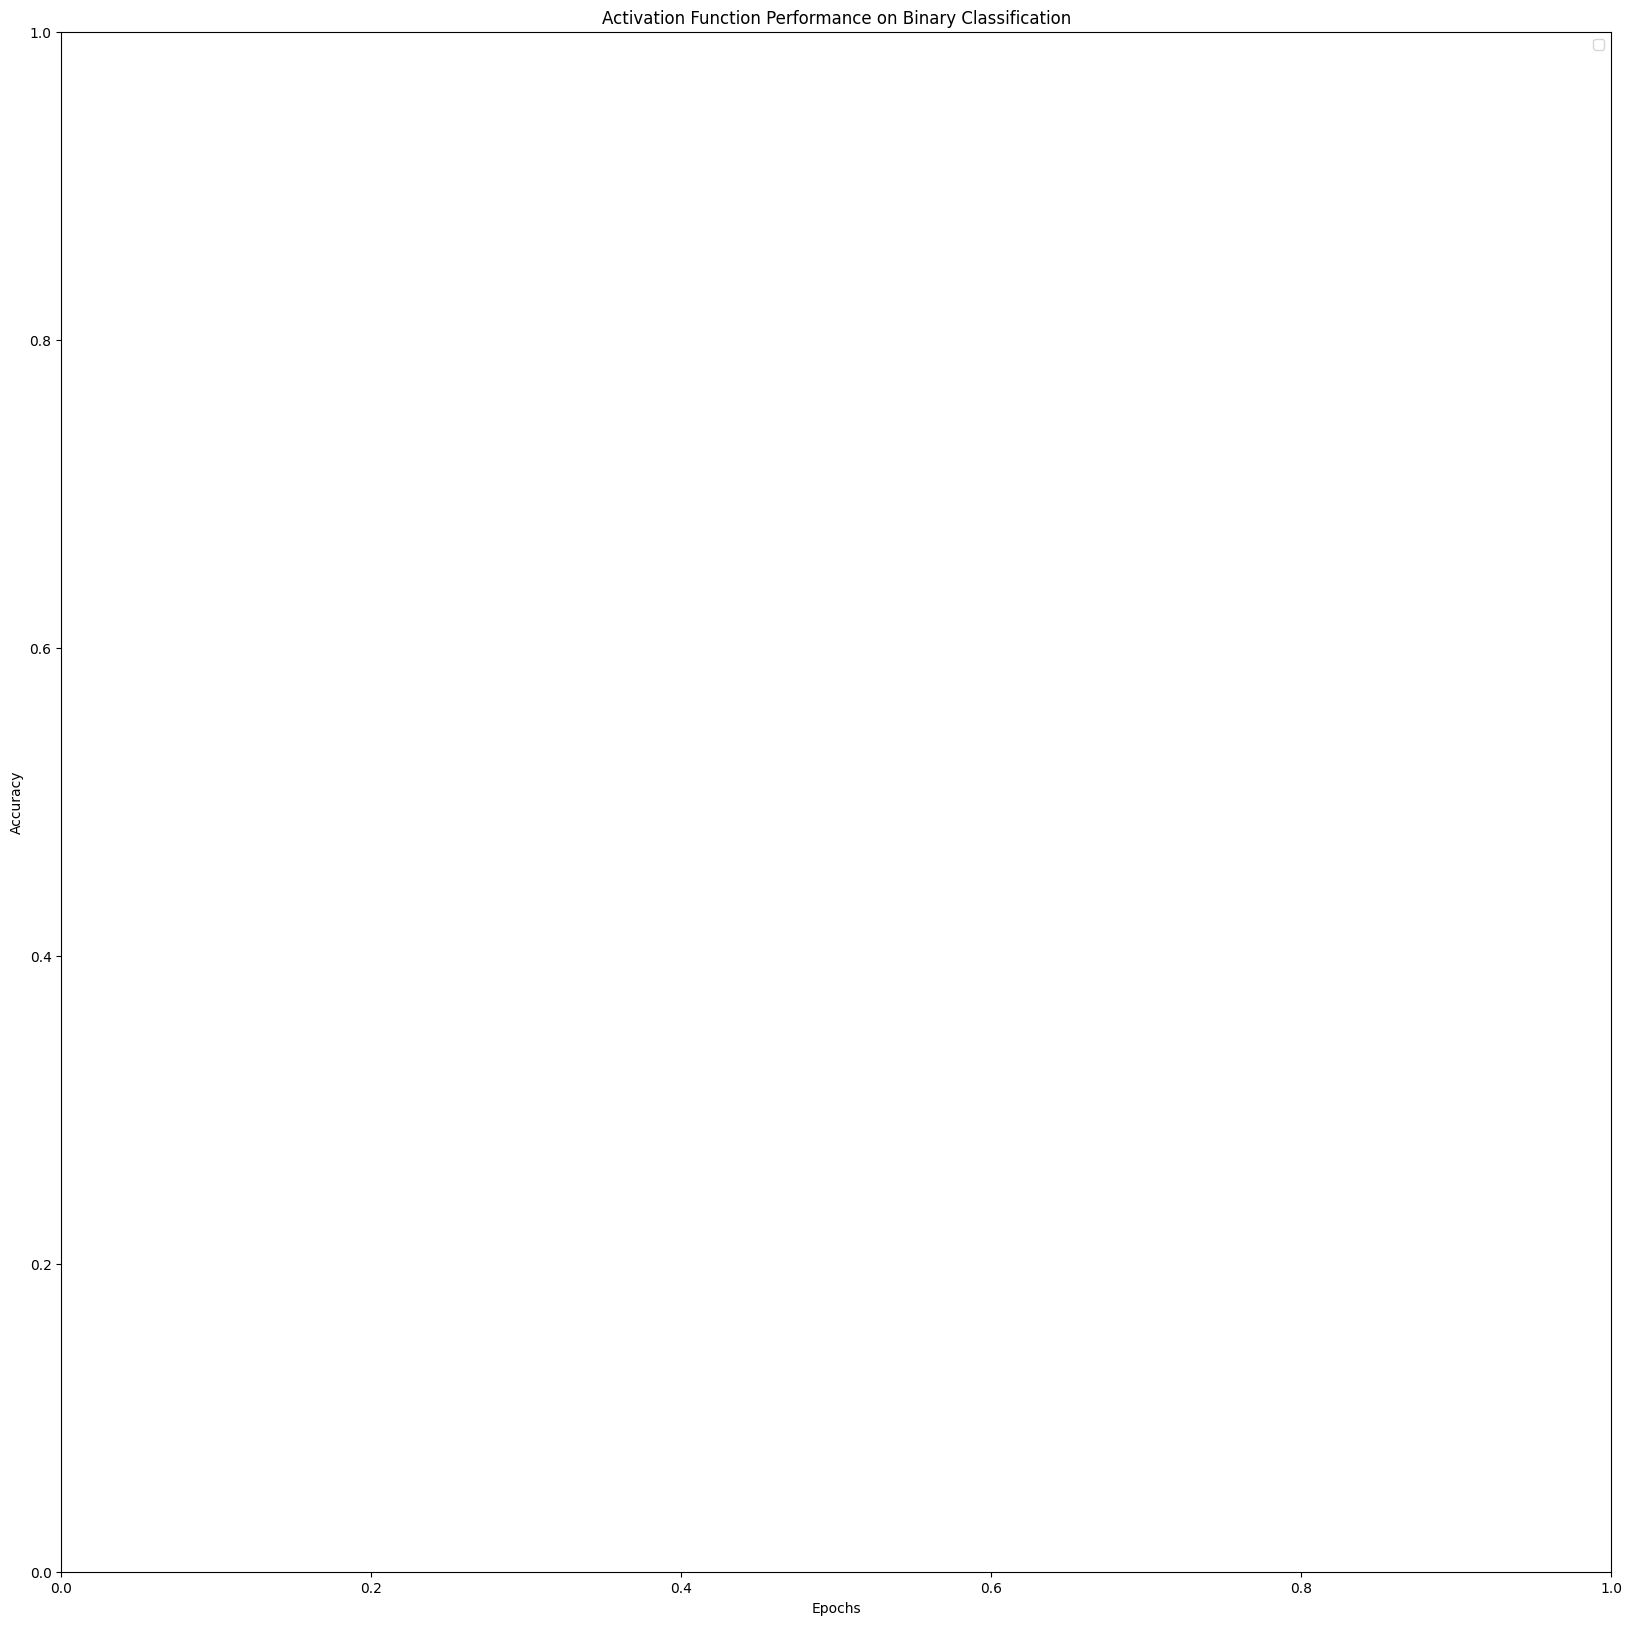

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

for name, result in results.items():
    plt.plot(result['train_accuracy'], label=f'{name} - Train Accuracy')
    plt.plot(result['test_accuracy'], label=f'{name} - Test Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Activation Function Performance on Binary Classification')
plt.legend()
plt.show()
